In [3]:
import fingerprint
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def To2DArr(img):
    im = np.zeros((len(img), len(img[0])), dtype=float)

    for r in range(len(img)):
        for c in range(len(img[r])):
            im[r][c] = np.mean(img[r][c])/255
    
    return im

In [5]:
img = cv2.imread("images/print1.png", cv2.IMREAD_ANYCOLOR)
im = To2DArr(img) # shape: (620, 424, 3)

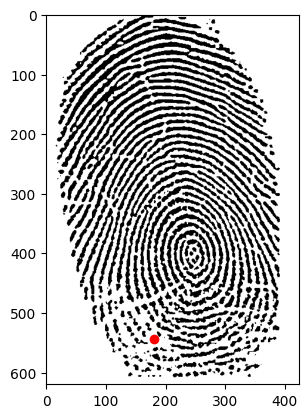

In [6]:
BnW_image = fingerprint.BinarizeFingerprint("images/print1.png", method='Pixel Blocks', blockSize=15)

plt.imshow(BnW_image, cmap='gray')
plt.scatter(180,543, c='r') # looking for center manually
plt.show()

In [7]:
print(BnW_image.shape)

(620, 424)


In [8]:
# Radial filtration
from gtda.images import RadialFiltration

center = np.array([180, 543])
radial_filtration = RadialFiltration(center=center)
X = np.array([BnW_image]) # has shape (1, 620, 424) where 1 is # of samples
im_filtration = radial_filtration.fit_transform(X)

In [9]:
radial_filtration.plot(im_filtration, colorscale='jet')

In [10]:
# Calculate persistence diagram
from gtda.homology import CubicalPersistence

cubical_persistence = CubicalPersistence()
im_cubical = cubical_persistence.fit_transform(im_filtration)

In [11]:
cubical_persistence.plot(im_cubical)

In [4]:
# import cv2

# img = cv2.imread(r'DB1_B\102_5.tif', cv2.IMREAD_GRAYSCALE)
# im_bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
# cv2.imwrite('bw_image.png', im_bw)

True